In [271]:
from interpretable_ssl.pbmc3k.trainer import PBMC3kTrainer

trainer = PBMC3kTrainer()

loading data
model name : num-prot-32_hidden-64_bs-128.pth


In [272]:
# load model
import torch
model = trainer.get_model()
model.load_state_dict(torch.load(trainer.get_model_path())["model_state_dict"])
model.to(trainer.device)

ProtClassifier(
  (encoder): VariationalEncoder(
    (linear1): Linear(in_features=13714, out_features=64, bias=True)
    (linear2): Linear(in_features=64, out_features=8, bias=True)
    (linear3): Linear(in_features=64, out_features=8, bias=True)
    (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn3): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (decoder): Decoder(
    (linear1): Linear(in_features=8, out_features=64, bias=True)
    (linear2): Linear(in_features=64, out_features=13714, bias=True)
    (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm1d(13714, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (classifier): Linear(in_features=32, out_features=8, bias=False)
  (classification_loss): CrossEntropyLoss()
)

In [273]:
model.to(trainer.device)

ProtClassifier(
  (encoder): VariationalEncoder(
    (linear1): Linear(in_features=13714, out_features=64, bias=True)
    (linear2): Linear(in_features=64, out_features=8, bias=True)
    (linear3): Linear(in_features=64, out_features=8, bias=True)
    (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn3): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (decoder): Decoder(
    (linear1): Linear(in_features=8, out_features=64, bias=True)
    (linear2): Linear(in_features=64, out_features=13714, bias=True)
    (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm1d(13714, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (classifier): Linear(in_features=32, out_features=8, bias=False)
  (classification_loss): CrossEntropyLoss()
)

In [274]:
# calculate all latent
adata = trainer.dataset.adata
x = adata.X.toarray()
x = torch.tensor(x)
x = x.to(trainer.device)
latent, _, _ = model(x)

In [275]:
y = adata.obs.cell_type.values
y = list(y)
y = trainer.dataset.le.transform(y)
y = torch.tensor(y, device=trainer.device)

In [279]:
import torch
diff = torch.cdist(latent, model.prototype_vectors)
diff.shape

torch.Size([2638, 32])

In [280]:
adata.obsm['latent-diff'] = diff.detach().cpu().numpy()

/home/icb/fatemehs.hashemig/miniconda3/envs/interpretable-ssl/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/fatemehs.hashemig/miniconda3/envs/interpretable-ssl/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


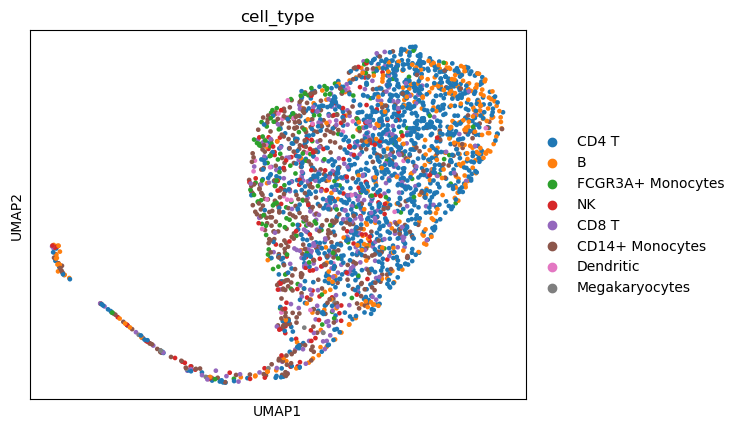

In [284]:
import scanpy as sc
sc.pp.neighbors(adata, use_rep='latent-diff')
sc.tl.umap(adata)
sc.pl.umap(adata, color=['cell_type'])

/home/icb/fatemehs.hashemig/miniconda3/envs/interpretable-ssl/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/fatemehs.hashemig/miniconda3/envs/interpretable-ssl/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


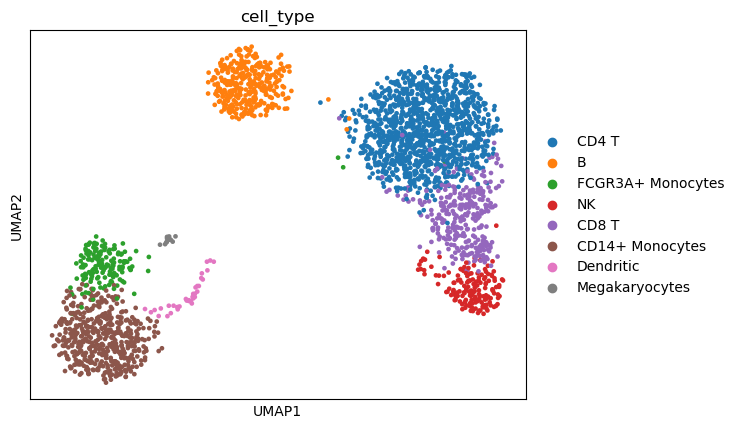

In [283]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['cell_type'])